<table align="left">
  <td>
    <a ref="C:/Users/josep/Snowman/Reforçat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" ref="C:/Users/josep/Snowman/Reforçat.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>



In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import glob
import random
import time
from IPython.display import clear_output


# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


C:\Users\josep\anaconda3\envs\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\josep\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\josep\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
path='C:/Users/josep/Snowman/Dades/numpy/'

files=glob.glob(path+"*.npy") 

l=[]
for f in files:
    aux=np.load(f)
    l.append(aux)

fnp=np.array(l)

print(fnp.shape)

n=fnp.shape[1]
m=fnp.shape[2]





(32, 8, 16)


In [3]:
inputsenc=tf.keras.layers.Input(shape=((n,m)))
x=tf.keras.layers.Reshape((n,m,1)) (inputsenc)
x=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu') (x)
x=tf.keras.layers.MaxPooling2D((2,2)) (x)
x=tf.keras.layers.BatchNormalization() (x)
x=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu') (x)
x=tf.keras.layers.MaxPooling2D((2,2)) (x)
x=tf.keras.layers.BatchNormalization() (x)
'''x=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu') (x)
x=tf.keras.layers.MaxPooling2D((2,2)) (x)
x=tf.keras.layers.BatchNormalization() (x)'''
outputsenc=tf.keras.layers.Flatten() (x)



#inputsdeco=tf.keras.layers.Input(shape=([256]))
inputsdeco=tf.keras.layers.Reshape((2,4,64)) (outputsenc)
'''x=tf.keras.layers.Conv2DTranspose(64,(3,3),padding='same',activation='relu') (inputsdeco)
x=tf.keras.layers.UpSampling2D((2,2)) (x)
x=tf.keras.layers.BatchNormalization() (x)'''
x=tf.keras.layers.Conv2DTranspose(32,(3,3),padding='same',activation='relu') (x)
x=tf.keras.layers.UpSampling2D((2,2)) (x)
x=tf.keras.layers.BatchNormalization() (x)
x=tf.keras.layers.Conv2DTranspose(1,(3,3),padding='same',activation='relu') (x)
x=tf.keras.layers.UpSampling2D((2,2)) (x)
outputsdeco=tf.keras.layers.Reshape((n,m)) (x)



model=decoder=tf.keras.models.Model(inputs=inputsenc,outputs=outputsdeco)


model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
print(model.summary())

encoder=tf.keras.models.Model(inputs=inputsenc,outputs=outputsenc)





Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 16)]           0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 16, 1)          0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 16, 32)         320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 8, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 8, 32)          128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 4, 64)          0     

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fnp, fnp, test_size = 0.30, random_state = 13, shuffle=True)

history=model.fit(x=fnp,y=fnp,validation_data=(X_train,y_train),shuffle=True,epochs=1000,verbose=1,batch_size=32)

Epoch 1/1000
1/1 [==============================] - 1s 642ms/step - loss: 0.8956 - val_loss: 0.1172
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4292 - val_loss: 0.1177
Epoch 3/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2715 - val_loss: 0.1191
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2057 - val_loss: 0.1195
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1720 - val_loss: 0.1190
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1463 - val_loss: 0.1178
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1340 - val_loss: 0.1166
Epoch 8/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1296 - val_loss: 0.1161
Epoch 9/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1201 - val_loss: 0.1161
Epoch 10/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1075 - val_loss: 0.1165
Epoch 11

Text(0.5, 1.0, 'Training and validation loss')

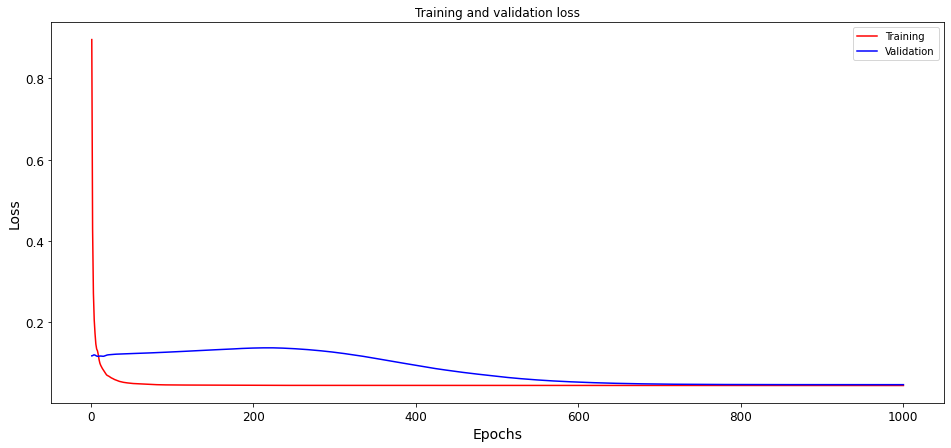

In [5]:
#grafiquem la funció de cost i l'accuracy
plt.figure(figsize=(16,7))
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(["Training", "Validation" ])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and validation loss')

In [6]:
encoder.save('C:/Users/josep/Snowman/encoder.h5')